Сегодня мы поговорим о морфологических анализаторах для русского языка и некоторых других языков.  

http://web-corpora.net/wsgi/mystemplus.wsgi/mystemplus/compare_table/ сравнение тэггеров.  

Не забудьте установить нужные библиотеки.

In [29]:
!pip install pymystem3

In [30]:
import re

In [31]:
text_rus = '''И пунша пламень голубой.
Люблю воинственную живость
Потешных Марсовых полей,
Пехотных ратей и коней
Однообразную красивость,
В их стройно зыблемом строю
Лоскутья сих знамён победных,
Сиянье шапок этих медных,
Насквозь простреленных в бою.'''

Токенизация через nltk:

In [32]:
from nltk.tokenize import word_tokenize

In [33]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [34]:
text_tokens_nltk = word_tokenize(text_rus)
print(text_tokens_nltk)

['И', 'пунша', 'пламень', 'голубой', '.', 'Люблю', 'воинственную', 'живость', 'Потешных', 'Марсовых', 'полей', ',', 'Пехотных', 'ратей', 'и', 'коней', 'Однообразную', 'красивость', ',', 'В', 'их', 'стройно', 'зыблемом', 'строю', 'Лоскутья', 'сих', 'знамён', 'победных', ',', 'Сиянье', 'шапок', 'этих', 'медных', ',', 'Насквозь', 'простреленных', 'в', 'бою', '.']


Mystem -- свободно распространяемая библиотека с закрытым кодом. Майстем сам умеет токенизировать. Он устанавливает словарную форму (лемму), определяет часть речи и даёт разную морфологическую информацию, при этом выбирая один из наиболее вероятных разборов.

In [35]:
from pymystem3 import Mystem

# сохраняем класс в переменную
mystem = Mystem()

In [36]:
text_analyzed = mystem.analyze(text_rus)
text_analyzed

[{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'},
 {'text': ' '},
 {'analysis': [{'lex': 'пунш', 'wt': 1, 'gr': 'S,муж,неод=род,ед'}],
  'text': 'пунша'},
 {'text': ' '},
 {'analysis': [{'lex': 'пламень',
    'wt': 1,
    'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}],
  'text': 'пламень'},
 {'text': ' '},
 {'analysis': [{'lex': 'голубой',
    'wt': 0.9983341496,
    'gr': 'A=(вин,ед,полн,муж,неод|им,ед,полн,муж|пр,ед,полн,жен|дат,ед,полн,жен|род,ед,полн,жен|твор,ед,полн,жен)'}],
  'text': 'голубой'},
 {'text': '.'},
 {'text': '\n'},
 {'analysis': [{'lex': 'любить',
    'wt': 1,
    'gr': 'V,несов,пе=непрош,ед,изъяв,1-л'}],
  'text': 'Люблю'},
 {'text': ' '},
 {'analysis': [{'lex': 'воинственный', 'wt': 1, 'gr': 'A=вин,ед,полн,жен'}],
  'text': 'воинственную'},
 {'text': ' '},
 {'analysis': [{'lex': 'живость', 'wt': 1, 'gr': 'S,жен,неод=(вин,ед|им,ед)'}],
  'text': 'живость'},
 {'text': '\n'},
 {'analysis': [{'lex': 'потешный',
    'wt': 1,
    'gr': 'A=(пр,мн,пол

In [37]:
print(text_analyzed[4])

{'analysis': [{'lex': 'пламень', 'wt': 1, 'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}], 'text': 'пламень'}


In [38]:
print(type(text_analyzed))

<class 'list'>


Можно делать отдельные вещи:

In [39]:
text_lemmatized = mystem.lemmatize(text_rus)
print(text_lemmatized)

['и', ' ', 'пунш', ' ', 'пламень', ' ', 'голубой', '.', '\n', 'любить', ' ', 'воинственный', ' ', 'живость', '\n', 'потешный', ' ', 'марсовой', ' ', 'поле', ',\n', 'пехотный', ' ', 'рать', ' ', 'и', ' ', 'конь', '\n', 'однообразный', ' ', 'красивость', ',\n', 'в', ' ', 'их', ' ', 'стройно', ' ', 'зыбить', ' ', 'строй', '\n', 'лоскут', ' ', 'сей', ' ', 'знамя', ' ', 'победный', ',\n', 'сияние', ' ', 'шапка', ' ', 'этот', ' ', 'медный', ',\n', 'насквозь', ' ', 'прострелить', ' ', 'в', ' ', 'бой', '.', '\n']


Можно склеить всё в один лемматизированный текст:

In [40]:
new_text_lemmatized = ''.join(text_lemmatized)
print(new_text_lemmatized)

и пунш пламень голубой.
любить воинственный живость
потешный марсовой поле,
пехотный рать и конь
однообразный красивость,
в их стройно зыбить строй
лоскут сей знамя победный,
сияние шапка этот медный,
насквозь прострелить в бой.



In [41]:
# сделаем все красиво с индексами и доступом по ключам

print('Слово - ', text_analyzed[0]['text'])
print('Разбор слова - ', text_analyzed[0]['analysis'][0])
print('Лемма слова - ', text_analyzed[0]['analysis'][0]['lex'])
print('Грамматическая информация слова2 - ', text_analyzed[0]['analysis'][0]['gr'])

Слово -  И
Разбор слова -  {'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}
Лемма слова -  и
Грамматическая информация слова2 -  CONJ=


In [42]:
text_analyzed[0] #чтобы понять, что происходит наверху

{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'}

Функция, чтобы прикрепить частеречные теги к словам

In [43]:
def process_mystem_analysis(analysis_results):
    """
    Преобразует результаты анализа mystem в список токенов формата "слово_ЧастьРечи"

    Параметры:
    analysis_results (list): Результат работы метода mystem.analyze()

    Возвращает:
    list: Список строк в формате "слово_ЧастьРечи"
    """
    result_tokens = []

    for item in analysis_results:
        # Пропускаем пробелы и знаки препинания
        if item.get('text', '').strip() == '' or 'analysis' not in item:
            continue

        # Получаем текст токена
        token_text = item['text'].lower()

        # Если есть анализ и он не пустой
        if 'analysis' in item and item['analysis']:
            # Берем первый (наиболее вероятный) вариант анализа
            first_analysis = item['analysis'][0]

            # Извлекаем часть речи из поля 'gr'
            if 'gr' in first_analysis:
                # Извлекаем первую часть до запятой или знака равенства
                pos_tag = first_analysis['gr'].split(',')[0].split('=')[0]

                # Формируем токен в формате "слово_ЧастьРечи"
                formatted_token = f"{token_text}_{pos_tag}"
                result_tokens.append(formatted_token)
            else:
                # Если нет информации о части речи, добавляем просто слово
                result_tokens.append(token_text)
        else:
            # Если нет анализа, добавляем просто слово
            result_tokens.append(token_text)

    return result_tokens

In [44]:
# Преобразование в список токенов
tagged_tokens = process_mystem_analysis(text_analyzed)

# Вывод результата
print(" ".join(tagged_tokens))

и_CONJ пунша_S пламень_S голубой_A люблю_V воинственную_A живость_S потешных_A марсовых_S полей_S пехотных_A ратей_S и_CONJ коней_S однообразную_A красивость_S в_PR их_APRO стройно_ADV зыблемом_V строю_S лоскутья_S сих_APRO знамён_S победных_A сиянье_S шапок_S этих_APRO медных_A насквозь_ADV простреленных_V в_PR бою_S


Можно посмотреть предсказания для отдельных слов:

In [45]:
mystem.analyze('стекла')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': '\n'}]

In [46]:
mystem.analyze('стали')

[{'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

In [47]:
mystem.analyze('стекла и стали нам не хватает')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=дат'}],
  'text': 'нам'},
 {'text': ' '},
 {'analysis': [{'lex': 'не', 'wt': 1, 'gr': 'PART='}], 'text': 'не'},
 {'text': ' '},
 {'analysis': [{'lex': 'хватать',
    'wt': 1,
    'gr': 'V,несов=(непрош,ед,изъяв,3-л|непрош,изъяв)'}],
  'text': 'хватает'},
 {'text': '\n'}]

In [48]:
mystem.analyze('кринжевать')

[{'analysis': [{'lex': 'кринжевать',
    'wt': 0.1624500426,
    'qual': 'bastard',
    'gr': 'V,несов,пе=инф'},
   {'lex': 'кринжевать',
    'wt': 0.1612166906,
    'qual': 'bastard',
    'gr': 'V,несов,нп=инф'}],
  'text': 'кринжевать'},
 {'text': '\n'}]

In [49]:
mystem.analyze('Глокая куздра штеко будланула бокра и курдячит бокрёнка')

[{'analysis': [{'lex': 'глокай',
    'wt': 0.09304979929,
    'qual': 'bastard',
    'gr': 'S,муж,неод=род,ед'}],
  'text': 'Глокая'},
 {'text': ' '},
 {'analysis': [{'lex': 'куздра',
    'wt': 0.6292693823,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'куздра'},
 {'text': ' '},
 {'analysis': [{'lex': 'штеко',
    'wt': 0.2574119755,
    'qual': 'bastard',
    'gr': 'ADV='}],
  'text': 'штеко'},
 {'text': ' '},
 {'analysis': [{'lex': 'будланул',
    'wt': 0.03753661836,
    'qual': 'bastard',
    'gr': 'S,муж,од=(вин,ед|род,ед)'}],
  'text': 'будланула'},
 {'text': ' '},
 {'analysis': [{'lex': 'бокра',
    'wt': 0.8898982327,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'бокра'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'курдячить',
    'wt': 0.5,
    'qual': 'bastard',
    'gr': 'V,обсц,сов,пе=непрош,ед,изъяв,3-л'}],
  'text': 'курдячит'},
 {'text': ' '}

Некоторые вещи, которые могут встретиться в нотации:  

const (  
	Dictionary  = 0        // слово из словаря  
	Bastard     = 1        // не словарное  
	Sob         = 2        // из "быстрого словаря"  
	Prefixoid   = 4        // словарное + стандартный префикс (авто- мото- кино- фото-) всегда в компании с Bastard или Sob  
	Foundling   = 8        // непонятный набор букв, но проходящий в алфавит  
	BadRequest  = 16       // доп. флаг.: "плохая лемма" при наличии "хорошей" альтернативы ("махать" по форме "маша")  
	FromEnglish = 65536    // переведено с английского  
	ToEnglish   = 131072   // переведено на английский  
	Untranslit  = 262144   // "переведено" с транслита  
	Overrode    = 1048576  // текст леммы был перезаписан  
	Fix         = 16777216 // слово из фикс-листа  
    
https://pkg.go.dev/github.com/dveselov/mystem#section-readme

In [50]:
mystem.analyze('мы стали более лучше одеваться')

[{'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=им'}], 'text': 'мы'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'более', 'wt': 0.9999468251, 'gr': 'ADV='}],
  'text': 'более'},
 {'text': ' '},
 {'analysis': [{'lex': 'хорошо', 'wt': 0.5632475519, 'gr': 'ADV=срав,вводн'}],
  'text': 'лучше'},
 {'text': ' '},
 {'analysis': [{'lex': 'одеваться', 'wt': 1, 'gr': 'V,нп=инф,несов'}],
  'text': 'одеваться'},
 {'text': '\n'}]

In [51]:
mystem.analyze('сплав стали')

[{'analysis': [{'lex': 'сплав', 'wt': 1, 'gr': 'S,муж,неод=(вин,ед|им,ед)'}],
  'text': 'сплав'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

Плюсы Mystem:
- В целом высокое качество;
- Разрешается омонимия;
- Учитывается контекст при разборе;
- Основан на разметке НКРЯ.

Минусы Mystem:
- Медленный;  
- Требует некоторой работы для вывода на экран в удобочитаемом виде.

NLTK для английского языка

In [52]:
from nltk.tokenize import word_tokenize
import nltk

Список тэгов (Universal dependencies): https://universaldependencies.org/u/pos/
Список частеречных тэгов (Penn): https://cs.nyu.edu/~grishman/jet/guide/PennPOS.html   

In [53]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [54]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [55]:
text_2 = 'I love, cats.'
text_tok = word_tokenize(text_2) #мы импортировали уже знакомый вам токенизатор из NLTK. Токенизация нужна для разметки в этой библиотеке
tagged = nltk.pos_tag(text_tok)

In [57]:
import nltk
text_tok = word_tokenize(text_rus)
tagged = nltk.pos_tag(text_tok, lang='rus') #тэгсет похож на НКРЯ

LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger_rus[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_rus')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger_rus/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


Можно "подклеить" для удобства тэги к слову.

In [58]:
list_of_tagged = []
for elem in tagged:
    tag_tog = '_'.join(elem)
    list_of_tagged.append(tag_tog)
print(list_of_tagged)

['I_PRP', 'love_VBP', ',_,', 'cats_NNS', '._.']


In [ ]:
# Имя файла
text = "text_morph.txt"

# Чтение файла
with open(text, 'r', encoding='utf-8') as file:
    txt = file.read()

print(f"Файл успешно прочитан. Длина текста: {len(txt)} символов")
print(f"Тип переменной text_string: {type(txt)}")
txt[0:50]

In [ ]:
tagged_list = []
tokenized_txt = word_tokenize(txt)
for tagged_w in nltk.pos_tag(tokenized_txt, tagset='universal'):
  tagged_list.append('_'.join(tagged_w))
print(' '.join(tagged_list))
resulting_text = ' '.join(tagged_list)

Сколько у нас частей речи определенного вида?

In [ ]:
#для этого нам понадобятся регулярные выражения
number_of_pos = re.findall('[a-zA-Z]+_ADJ', resulting_text)
print(f'Your text has {len(number_of_pos)} adjectives.')

In [63]:
from nltk import FreqDist

In [64]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [65]:
from nltk.corpus import stopwords

Посмотрим на распределение без учёта частей речи:

In [66]:
stop_words = set(stopwords.words("english"))

In [ ]:
filtered_list = []
for word in tokenized_txt:
  if word.casefold() not in stop_words:
    filtered_list.append(word)
    new_text = ' '.join(filtered_list) #второй этап - убрали стоп-слова

    tokenizedtxt = word_tokenize(new_text.lower())
    frequency_distribution_1 = FreqDist(tokenizedtxt)

In [ ]:
frequency_distribution_1.plot(30, cumulative=False)

Повторим то же самое, только с учётом частеречных тэгов:

In [ ]:
tagged_words = nltk.pos_tag(tokenized_txt, tagset='universal')

tagged_list = ['_'.join(tagged_w) for tagged_w in tagged_words]

resulting_text = ' '.join(tagged_list)

processed_tokens = word_tokenize(resulting_text.lower())

frequency_distribution_2 = FreqDist(processed_tokens)


In [ ]:
frequency_distribution_2.plot(30, cumulative=False)

**Задание 1.** Извлеките ключевые слова из любых 2х текстов на английском и русском языке (не менее 4000 символов) тремя способами:  
    1) Используя просто токены;  
    2) Разметив на части речи;  
    3) Оставив только леммы или стеммы. Отличаются ли результат в топ-30?   
Визуализируйте с помощью frequency_distribution.plot. и библиотеки matplotlib

In [77]:
english_text = '''We live in two parallel worlds: the physical and the digital. In the latter, we are not just ourselves; we are curators, editors, and performers of our own identities. The concept of the "digital self" has evolved from a simple online profile into a complex, multifaceted entity that actively influences our offline lives, relationships, and even our mental health. This is not a virtual alter ego; it is an integral part of who we are in the 21st century.

The creation of a digital identity begins with a fundamental act of curation. We choose profile pictures that present us at our best, share accomplishments, witty thoughts, and picturesque moments. We craft bios that summarize our essence in a few characters. This process is inherently performative. As sociologist Erving Goffman theorized about social life in the 1950s, we are all actors on a stage. Social media has simply provided new, globally visible stages with audiences of thousands. The "front stage" is our polished feed; the "backstage" is the messy, unfiltered reality often left unseen. This constant performance can lead to the "highlight reel" effect, where comparing our own backstage to others' front stages fuels anxiety, envy, and a distorted sense of reality.

However, the digital self also offers unprecedented opportunities for exploration and authenticity. For marginalized individuals, it can be a lifeline—a space to find community, express gender or sexual identity freely, and connect with like-minded people across the globe. It allows for the experimentation with different aspects of personality, interests, and forms of expression in a relatively low-risk environment. A shy person can become a charismatic blogger; an aspiring artist can find their first audience. In this sense, the digital realm acts as an identity workshop, where different versions of the self can be tried on and developed, some of which may then integrate into the offline persona.

The stakes of this digital identity have skyrocketed as the lines between worlds blur. Our digital selves are scrutinized by potential employers, universities, and partners. They are commodified by algorithms that turn our preferences, relationships, and behaviors into data points for targeted advertising. The digital self is no longer just a representation; it is a data-driven asset with economic and social value. This creates a pressure to maintain a personal "brand" consistently, which can be exhausting and lead to a sense of inauthenticity—the feeling of being trapped in one's own curated narrative.

Perhaps the most profound impact is on memory and self-narrative. Our digital identities create a permanent, searchable archive of our lives. This externalized memory shapes how we tell our own story. We revisit past posts, which can reinforce certain narratives about ourselves ("I was always happy," "I've always been interested in this") and suppress others. The feedback loop of likes and comments acts as a social validator, telling us which aspects of our identity are rewarded and which are ignored, subtly guiding future performance.

Navigating this duality is the great challenge of our age. The key lies in cultivating digital self-awareness. It means recognizing the curated nature of online content, both ours and others'. It involves consciously deciding on the balance between performance and authenticity, between sharing and privacy. It requires occasional digital detoxes to reconnect with the unmediated, offline self. The goal is not to abandon the digital self but to integrate it healthily, using it as a tool for connection and expression rather than letting it become a source of alienation or a master to be served. Ultimately, a healthy identity in the digital age is one that remains fluid, self-aware, and grounded in the understanding that both the profile and the person are real, but neither tells the whole story.'''

In [78]:
russian_text = '''
Мы часто говорим: «время летит» или «время тянется». Но что, если время — это не просто универсальные секунды на часах, а сложный культурный и психологический конструкт, который мы сами и создаем? Восприятие времени радикально отличается в разных обществах и даже в разные периоды жизни одного человека.

Для западного мира, с его корнями в иудео-христианской традиции и линейной историей, время чаще всего представляется прямой линией, стрелой, летящей из прошлого через настоящее в будущее. Оно конечно, необратимо и драгоценно. Отсюда рождается знаменитое «time is money» — время становится ресурсом, который можно «тратить», «экономить» или «терять». Наша жизнь превращается в проект с дедлайнами и планами. Календари, расписания, списки задач — всё это инструменты для управления этой линейной, неумолимой субстанцией.

Но во многих других культурах время воспринимается циклично. Оно вращается подобно сезонам, повторяясь в природных и ритуальных циклах. Такой взгляд характерен для многих восточных философий и традиционных аграрных обществ. Здесь важнее не покорение будущего, а гармония с текущим моментом и соблюдение ритмов. Будущее не является чем-то принципиально новым — оно возвращение и переосмысление уже бывшего. Это порождает более спокойное, хотя и не менее дисциплинированное, отношение к течению жизни. Нет паники перед «упущенным временем», потому что цикл всегда даст новый шанс.

На индивидуальном уровне наше восприятие времени диктуется психологией и нейробиологией. Для ребенка лето длится вечность, потому что каждый день насыщен новыми нейронными связями, впечатлениями. Мозг обрабатывает гигантские объемы неизведанной информации, и субъективно это растягивает временной промежуток. Для взрослого рутинная жизнь, где много действий доведено до автоматизма, «сжимается» в памяти. Недели и месяцы пролетают незаметно, потому что мозг, экономя энергию, не фиксирует однообразные события. Чтобы «замедлить» время, нам нужна новизна, сильные эмоции (часто даже стресс) и осознанное присутствие в моменте — практика mindfulness, по сути, является попыткой противостоять этому сжатию.

Интересно и то, как технологии изменили наше чувство времени. Цифровая эпоха принесла ощущение мгновенности. Ответы на сообщения, новости, стриминговый контент — всё доступно здесь и сейчас. Это создает иллюзию ускоренного времени и культуру нетерпения. Одновременно возможность бесконечно скроллить ленту соцсетей или пересматривать сериалы порождает странный феномен «временной потери», прокрастинации, когда часы растворяются в цифровом потоке без ощутимого результата.

Таким образом, время — это гораздо больше, чем физическая константа. Это гибкая ткань, сплетаемая из культуры, психологии, технологий и личного опыта. Осознание этой многогранности позволяет нам лучше понимать не только других, но и самих себя. Может быть, секрет управления временем лежит не в новых техниках тайм-менеджмента, а в способности выбирать и осознавать ту призму, через которую мы на него смотрим. Перестать быть рабом «стрелы времени» и иногда позволять себе просто наблюдать за его циклом или погружаться в безвременье текущего момента — это и есть высшая свобода в мире, помешанном на скорости.'''

In [73]:
!pip install nltk spacy pymorphy2
!python -m spacy download ru_core_news_sm

import re

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import spacy
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')
russian_stopwords = set(stopwords.words('russian'))
nlp_ru = spacy.load("ru_core_news_sm")
english_stopwords = set(stopwords.words('english'))
nlp_en = spacy.load("en_core_web_sm")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 33.1 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=582c38ee3cdb8fce93a8213074d94fbfdbd91b984ed1dd2f4cdaf6d95d2f5dce
  Stored in directory: /root/.cache/pip/wheels/1a/bf/a1/4cee4f7678c68c5875ca89eaccf460593539805c3906722228
Successfully built docopt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 66.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by sele

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
from nltk import FreqDist

In [75]:
def no_trash_text(text):
    punctuation = string.punctuation
    translator = str.maketrans('', '', punctuation)
    text = text.translate(translator)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = " ".join(text.split())
    return text

['live', 'two', 'parallel', 'worlds', 'physical', 'digital', 'latter', 'curators', 'editors', 'performers', 'identities', 'concept', 'digital', 'self', 'evolved', 'simple', 'online', 'profile', 'complex', 'multifaceted', 'entity', 'actively', 'influences', 'offline', 'lives', 'relationships', 'even', 'mental', 'health', 'virtual', 'alter', 'ego', 'integral', 'part', 'st', 'century', 'creation', 'digital', 'identity', 'begins', 'fundamental', 'act', 'curation', 'choose', 'profile', 'pictures', 'present', 'us', 'best', 'share', 'accomplishments', 'witty', 'thoughts', 'picturesque', 'moments', 'craft', 'bios', 'summarize', 'essence', 'characters', 'process', 'inherently', 'performative', 'sociologist', 'erving', 'goffman', 'theorized', 'social', 'life', 'actors', 'stage', 'social', 'media', 'simply', 'provided', 'new', 'globally', 'visible', 'stages', 'audiences', 'thousands', 'front', 'stage', 'polished', 'feed', 'backstage', 'messy', 'unfiltered', 'reality', 'often', 'left', 'unseen', '

<Axes: xlabel='Samples', ylabel='Counts'>

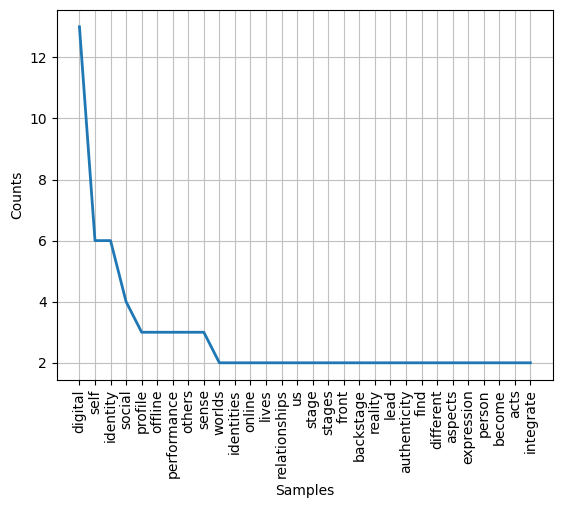

In [79]:
from nltk.tokenize import word_tokenize
import nltk
import string
english_text = no_trash_text(english_text)
russian_text = no_trash_text(russian_text)
# Первый способ с простыми токенами
eng_text_tokens_nltk = word_tokenize(english_text)
rus_text_tokens_nltk = word_tokenize(russian_text)
eng_filtered_tokens = [token for token in eng_text_tokens_nltk if token not in english_stopwords]
rus_filtered_tokens = [token for token in rus_text_tokens_nltk if token not in russian_stopwords]
print(eng_filtered_tokens)
print(rus_filtered_tokens)
frequency_distribution_1 = FreqDist(eng_filtered_tokens)
frequency_distribution_1.plot(30, cumulative=False)

<Axes: xlabel='Samples', ylabel='Counts'>

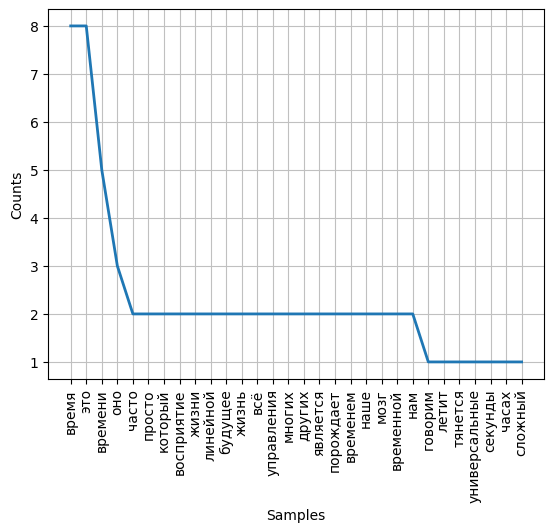

In [80]:
frequency_distribution_1 = FreqDist(rus_filtered_tokens)
frequency_distribution_1.plot(30, cumulative=False)

In [81]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('universal_tagset')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [82]:
tagged_eng = nltk.pos_tag(eng_filtered_tokens)
tagged_rus = nltk.pos_tag(rus_filtered_tokens)
# Второй способ с разметкой на части речи
eng_list_of_tagged = []
for elem in tagged_eng:
    tag_tog = '_'.join(elem)
    eng_list_of_tagged.append(tag_tog)
print(eng_list_of_tagged)
rus_list_of_tagged = []
for elem in tagged_rus:
    tag_tog = '_'.join(elem)
    rus_list_of_tagged.append(tag_tog)
print(rus_list_of_tagged)


['live_JJ', 'two_CD', 'parallel_JJ', 'worlds_NNS', 'physical_JJ', 'digital_JJ', 'latter_NN', 'curators_NNS', 'editors_NNS', 'performers_NNS', 'identities_NNS', 'concept_VBP', 'digital_JJ', 'self_NN', 'evolved_VBD', 'simple_JJ', 'online_JJ', 'profile_NN', 'complex_NN', 'multifaceted_VBD', 'entity_NN', 'actively_RB', 'influences_VBZ', 'offline_JJ', 'lives_NNS', 'relationships_NNS', 'even_RB', 'mental_VBP', 'health_NN', 'virtual_JJ', 'alter_NN', 'ego_NN', 'integral_JJ', 'part_NN', 'st_JJ', 'century_NN', 'creation_NN', 'digital_JJ', 'identity_NN', 'begins_VBZ', 'fundamental_JJ', 'act_NN', 'curation_NN', 'choose_VBP', 'profile_JJ', 'pictures_NNS', 'present_JJ', 'us_PRP', 'best_JJS', 'share_NN', 'accomplishments_NNS', 'witty_JJ', 'thoughts_NNS', 'picturesque_NN', 'moments_NNS', 'craft_VBP', 'bios_NNS', 'summarize_VB', 'essence_NN', 'characters_NNS', 'process_VBP', 'inherently_RB', 'performative_JJ', 'sociologist_NN', 'erving_VBG', 'goffman_JJ', 'theorized_VBN', 'social_JJ', 'life_NN', 'actor

<Axes: xlabel='Samples', ylabel='Counts'>

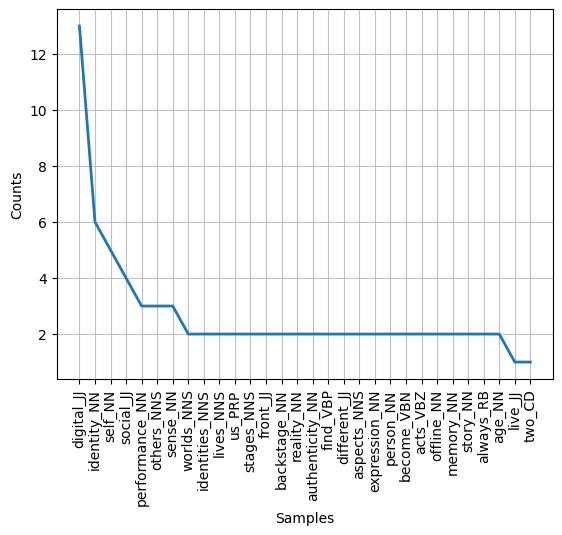

In [83]:
frequency_distribution_3 = FreqDist(eng_list_of_tagged)
frequency_distribution_3.plot(30, cumulative=False)

<Axes: xlabel='Samples', ylabel='Counts'>

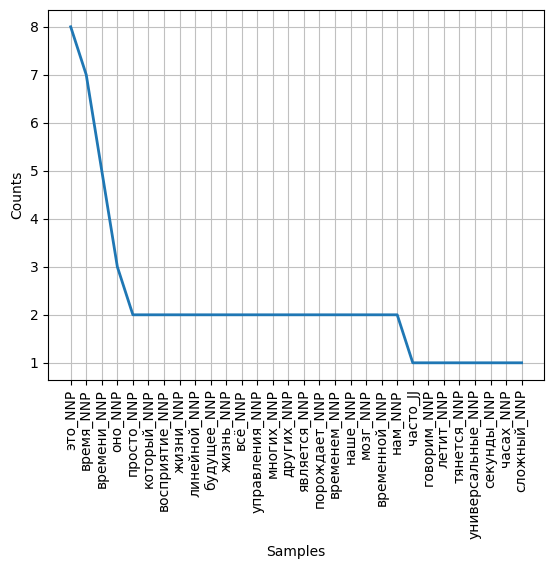

In [84]:
frequency_distribution_3 = FreqDist(rus_list_of_tagged)
frequency_distribution_3.plot(30, cumulative=False)

In [85]:
from nltk.stem import WordNetLemmatizer
from pymystem3 import Mystem
mystem = Mystem()
stop_words = set(stopwords.words('russian'))


In [86]:
# Третий способ с леммами
wordnet_lemmatizer = WordNetLemmatizer()
lemmas_eng = []
for token in eng_filtered_tokens:
  lemmas_eng.append(wordnet_lemmatizer.lemmatize(token))
lemmas = mystem.lemmatize(russian_text)
lemmas_rus = []
for lemma in lemmas:
    lemma = lemma.strip().lower()
    if lemma and lemma.isalpha():
        if lemma in stop_words:
            continue
        lemmas_rus.append(lemma)
print(lemmas_eng)
print(lemmas_rus)

['live', 'two', 'parallel', 'world', 'physical', 'digital', 'latter', 'curator', 'editor', 'performer', 'identity', 'concept', 'digital', 'self', 'evolved', 'simple', 'online', 'profile', 'complex', 'multifaceted', 'entity', 'actively', 'influence', 'offline', 'life', 'relationship', 'even', 'mental', 'health', 'virtual', 'alter', 'ego', 'integral', 'part', 'st', 'century', 'creation', 'digital', 'identity', 'begin', 'fundamental', 'act', 'curation', 'choose', 'profile', 'picture', 'present', 'u', 'best', 'share', 'accomplishment', 'witty', 'thought', 'picturesque', 'moment', 'craft', 'bios', 'summarize', 'essence', 'character', 'process', 'inherently', 'performative', 'sociologist', 'erving', 'goffman', 'theorized', 'social', 'life', 'actor', 'stage', 'social', 'medium', 'simply', 'provided', 'new', 'globally', 'visible', 'stage', 'audience', 'thousand', 'front', 'stage', 'polished', 'feed', 'backstage', 'messy', 'unfiltered', 'reality', 'often', 'left', 'unseen', 'constant', 'perform

<Axes: xlabel='Samples', ylabel='Counts'>

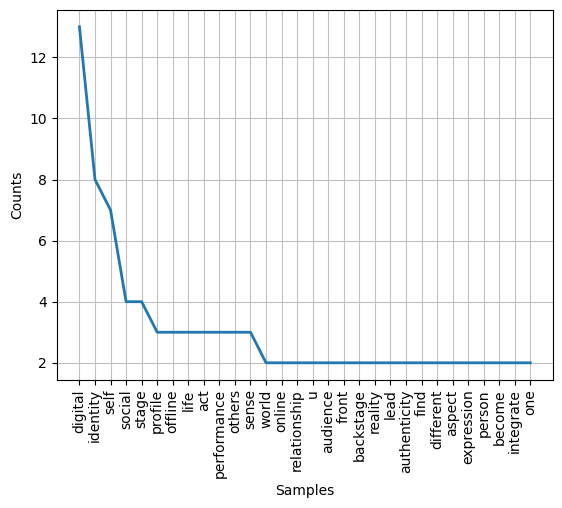

In [87]:
frequency_distribution_4 = FreqDist(lemmas_eng)
frequency_distribution_4.plot(30, cumulative=False)

<Axes: xlabel='Samples', ylabel='Counts'>

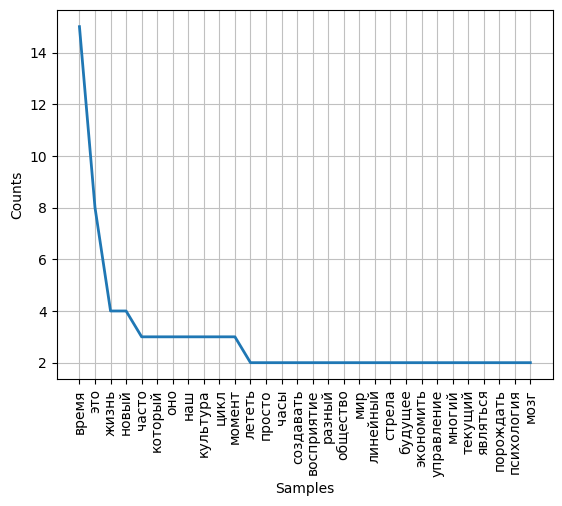

In [88]:
frequency_distribution_4 = FreqDist(lemmas_rus)
frequency_distribution_4.plot(30, cumulative=False)